# Detección de Atípicos
Cosijoeza Melchor Nolasco

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
out = []
def Zscore_outlier(df,umbral):
  mean = np.mean(df)
  standarDesviation = np.std(df)
  for i in df:
      z = (i - mean) / standarDesviation
      if np.abs(z) > umbral:
        out.append(i)
  print("Outliers: ",out)
Zscore_outlier(data['LotArea'],umbral=3)

Outliers:  [50271, 159000, 215245, 164660, 53107, 70761, 53227, 46589, 115149, 53504, 45600, 63887, 57200]


In [ ]:
Zscore_outlier(data['SalePrice'])

Outliers:  [50271, 159000, 215245, 164660, 53107, 70761, 53227, 46589, 115149, 53504, 45600, 63887, 57200, 438780, 501837, 475000, 437154, 426000, 555000, 440000, 430000, 446261, 451950, 423000, 755000, 538000, 485000, 582933, 611657, 556581, 424870, 625000, 745000, 465000, 466500]


In [ ]:
data.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def box_plots(df):
  plt.figure(figsize=(10,4))
  plt.title("Box Plot")
  sns.boxplot(df)
  plt.show()

## Ejemplo - Fireplaces

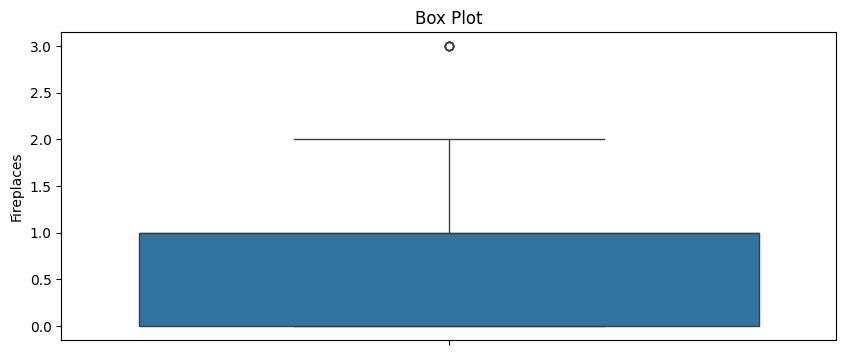

In [ ]:
box_plots(data['Fireplaces'])

In [ ]:
def hists_plot(df):
  plt.figure(figsize=(10,4))
  plt.hist(df)
  plt.title("Histograma Plot")
  plt.show()

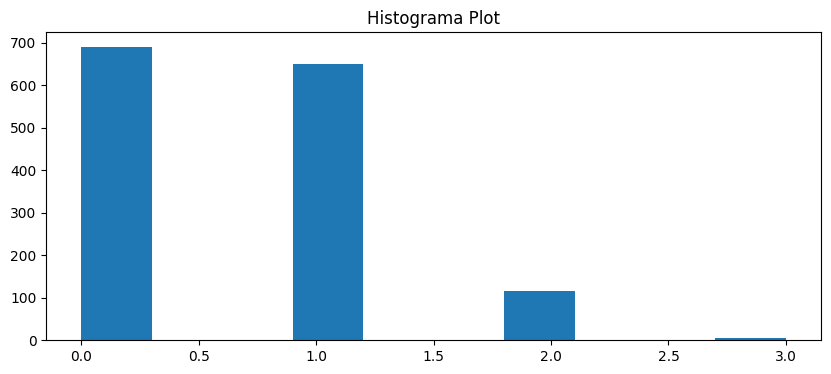

In [ ]:
hists_plot(data['Fireplaces'])

In [ ]:
def dist_plot(df):
  plt.figure(figsize=(10,4))
  sns.distplot(df)
  plt.title("Distribution Plot")
  sns.despine()
  plt.show()

<ipython-input-17-70e5f0238ccb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


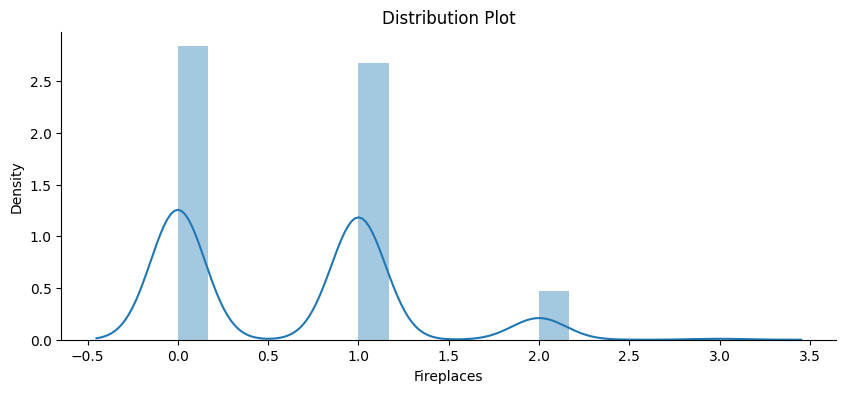

In [ ]:
dist_plot(data['Fireplaces'])

In [ ]:
from statsmodels.graphics.gofplots import qqplot
def qq_plots(df):
  plt.figure(figsize=(10,4))
  qqplot(df,line='s')
  plt.title("Normal QQPlot")
  plt.show()

<Figure size 1000x400 with 0 Axes>

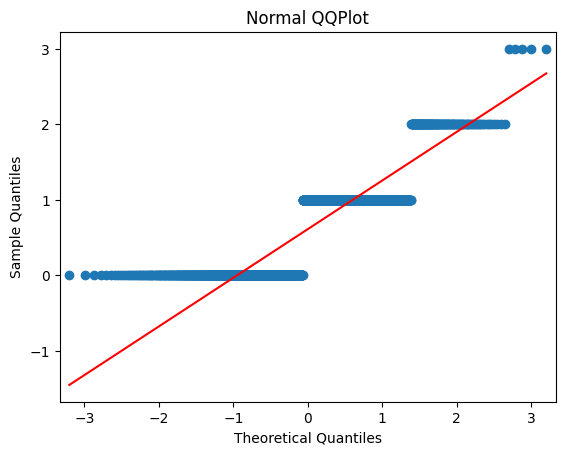

In [ ]:
qq_plots(data['Fireplaces'])

## 1.- LotArea

Sus datos atípicos:

In [ ]:
Zscore_outlier(data['LotArea'],umbral=3)

Outliers:  [50271, 159000, 215245, 164660, 53107, 70761, 53227, 46589, 115149, 53504, 45600, 63887, 57200, 1880, 1880, 1880, 1880, 1875, 1872, 1880, 1880, 1880, 1880, 1875, 1872, 2003, 1915, 2004, 1931, 1939, 2005, 2006, 1929, 2004, 2005, 1930, 2002, 2007, 2007, 1927, 1920, 2007, 2005, 2004, 2005, 2003, 2006, 1920, 1934, 2004, 2006, 2004, 1920, 2006, 1921, 2004, 2003, 1915, 1910, 2007, 2005, 2009, 1915, 1921, 1910, 1920, 2009, 1931, 2003, 1885, 1919, 2007, 2006, 2005, 1939, 1935, 1930, 2005, 2004, 1931, 2004, 1936, 2007, 1923, 1924, 2009, 2004, 2005, 2003, 2005, 1926, 1940, 2007, 2004, 1941, 2008, 1923, 1920, 2003, 1908, 1892, 1916, 1932, 2004, 2007, 1918, 1912, 2004, 2003, 1924, 2004, 1925, 2009, 2009, 2004, 1925, 1939, 2005, 2006, 2002, 2003, 2005, 2002, 2004, 2007, 2008, 1900, 1910, 2003, 1940, 2006, 2004, 2003, 2006, 2007, 1929, 1925, 1939, 1940, 2006, 1925, 2003, 2006, 2006, 2007, 2008, 2006, 1915, 2006, 1912, 1880, 2004, 1920, 1940, 2003, 1939, 1925, 2004, 2006, 2006, 2004, 1941,

In [ ]:
Zscore_outlier(data['LotArea'],umbral=400)

Outliers:  [50271, 159000, 215245, 164660, 53107, 70761, 53227, 46589, 115149, 53504, 45600, 63887, 57200, 1880, 1880, 1880, 1880, 1875, 1872, 1880, 1880, 1880, 1880, 1875, 1872, 2003, 1915, 2004, 1931, 1939, 2005, 2006, 1929, 2004, 2005, 1930, 2002, 2007, 2007, 1927, 1920, 2007, 2005, 2004, 2005, 2003, 2006, 1920, 1934, 2004, 2006, 2004, 1920, 2006, 1921, 2004, 2003, 1915, 1910, 2007, 2005, 2009, 1915, 1921, 1910, 1920, 2009, 1931, 2003, 1885, 1919, 2007, 2006, 2005, 1939, 1935, 1930, 2005, 2004, 1931, 2004, 1936, 2007, 1923, 1924, 2009, 2004, 2005, 2003, 2005, 1926, 1940, 2007, 2004, 1941, 2008, 1923, 1920, 2003, 1908, 1892, 1916, 1932, 2004, 2007, 1918, 1912, 2004, 2003, 1924, 2004, 1925, 2009, 2009, 2004, 1925, 1939, 2005, 2006, 2002, 2003, 2005, 2002, 2004, 2007, 2008, 1900, 1910, 2003, 1940, 2006, 2004, 2003, 2006, 2007, 1929, 1925, 1939, 1940, 2006, 1925, 2003, 2006, 2006, 2007, 2008, 2006, 1915, 2006, 1912, 1880, 2004, 1920, 1940, 2003, 1939, 1925, 2004, 2006, 2006, 2004, 1941,

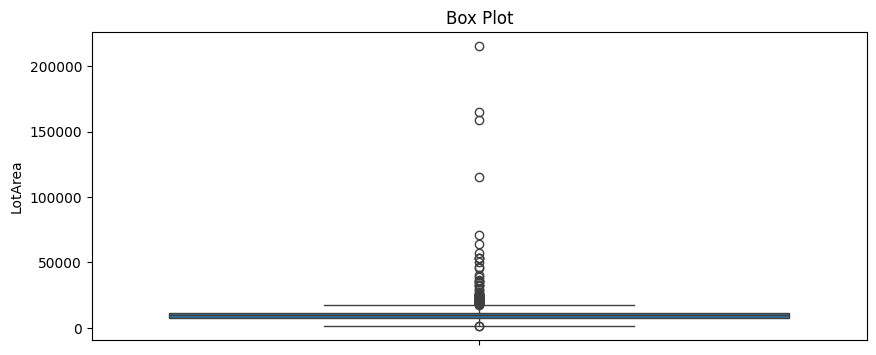

In [ ]:
box_plots(data['LotArea'])

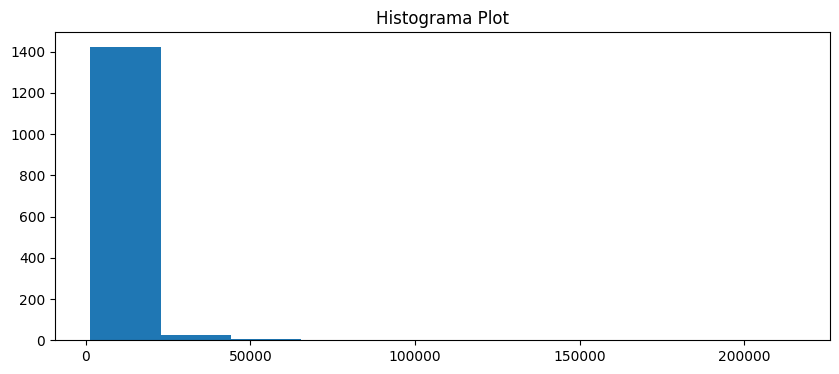

In [ ]:
hists_plot(data['LotArea'])

<ipython-input-17-70e5f0238ccb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


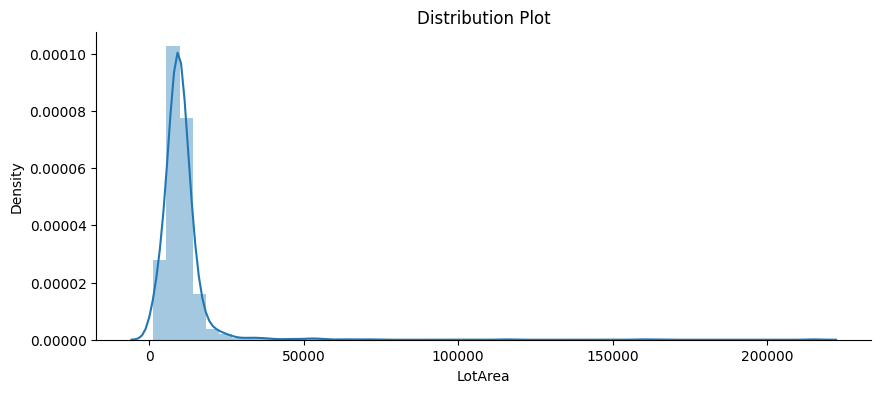

In [ ]:
dist_plot(data['LotArea'])

<Figure size 1000x400 with 0 Axes>

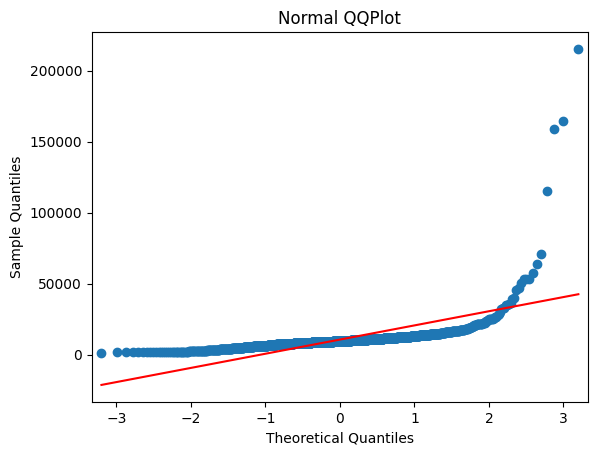

In [ ]:
qq_plots(data['LotArea'])

Los datos atípicos están de 50000 en adelante

## 2.-YearBuilt
Sus datos atípicos:

In [ ]:
Zscore_outlier(data['YearBuilt'],umbral=3)

Outliers:  [50271, 159000, 215245, 164660, 53107, 70761, 53227, 46589, 115149, 53504, 45600, 63887, 57200, 1880, 1880, 1880, 1880, 1875, 1872, 1880, 1880, 1880, 1880, 1875, 1872, 2003, 1915, 2004, 1931, 1939, 2005, 2006, 1929, 2004, 2005, 1930, 2002, 2007, 2007, 1927, 1920, 2007, 2005, 2004, 2005, 2003, 2006, 1920, 1934, 2004, 2006, 2004, 1920, 2006, 1921, 2004, 2003, 1915, 1910, 2007, 2005, 2009, 1915, 1921, 1910, 1920, 2009, 1931, 2003, 1885, 1919, 2007, 2006, 2005, 1939, 1935, 1930, 2005, 2004, 1931, 2004, 1936, 2007, 1923, 1924, 2009, 2004, 2005, 2003, 2005, 1926, 1940, 2007, 2004, 1941, 2008, 1923, 1920, 2003, 1908, 1892, 1916, 1932, 2004, 2007, 1918, 1912, 2004, 2003, 1924, 2004, 1925, 2009, 2009, 2004, 1925, 1939, 2005, 2006, 2002, 2003, 2005, 2002, 2004, 2007, 2008, 1900, 1910, 2003, 1940, 2006, 2004, 2003, 2006, 2007, 1929, 1925, 1939, 1940, 2006, 1925, 2003, 2006, 2006, 2007, 2008, 2006, 1915, 2006, 1912, 1880, 2004, 1920, 1940, 2003, 1939, 1925, 2004, 2006, 2006, 2004, 1941,

In [ ]:
Zscore_outlier(data['YearBuilt'],umbral=1950)

Outliers:  [50271, 159000, 215245, 164660, 53107, 70761, 53227, 46589, 115149, 53504, 45600, 63887, 57200, 1880, 1880, 1880, 1880, 1875, 1872, 1880, 1880, 1880, 1880, 1875, 1872, 2003, 1915, 2004, 1931, 1939, 2005, 2006, 1929, 2004, 2005, 1930, 2002, 2007, 2007, 1927, 1920, 2007, 2005, 2004, 2005, 2003, 2006, 1920, 1934, 2004, 2006, 2004, 1920, 2006, 1921, 2004, 2003, 1915, 1910, 2007, 2005, 2009, 1915, 1921, 1910, 1920, 2009, 1931, 2003, 1885, 1919, 2007, 2006, 2005, 1939, 1935, 1930, 2005, 2004, 1931, 2004, 1936, 2007, 1923, 1924, 2009, 2004, 2005, 2003, 2005, 1926, 1940, 2007, 2004, 1941, 2008, 1923, 1920, 2003, 1908, 1892, 1916, 1932, 2004, 2007, 1918, 1912, 2004, 2003, 1924, 2004, 1925, 2009, 2009, 2004, 1925, 1939, 2005, 2006, 2002, 2003, 2005, 2002, 2004, 2007, 2008, 1900, 1910, 2003, 1940, 2006, 2004, 2003, 2006, 2007, 1929, 1925, 1939, 1940, 2006, 1925, 2003, 2006, 2006, 2007, 2008, 2006, 1915, 2006, 1912, 1880, 2004, 1920, 1940, 2003, 1939, 1925, 2004, 2006, 2006, 2004, 1941,

In [ ]:
data['YearBuilt'].dtypes

dtype('int64')

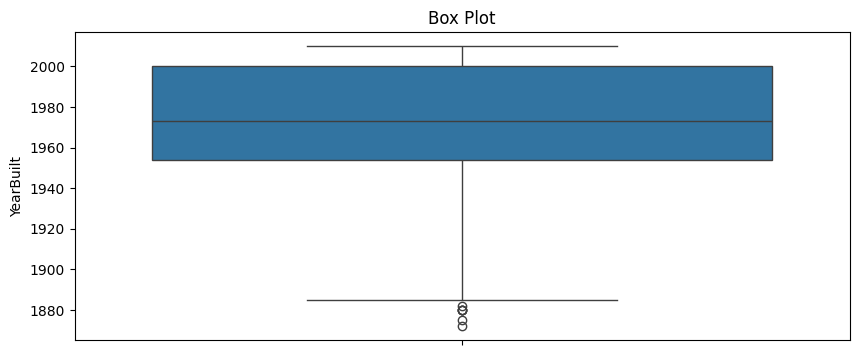

In [ ]:
box_plots(data['YearBuilt'])

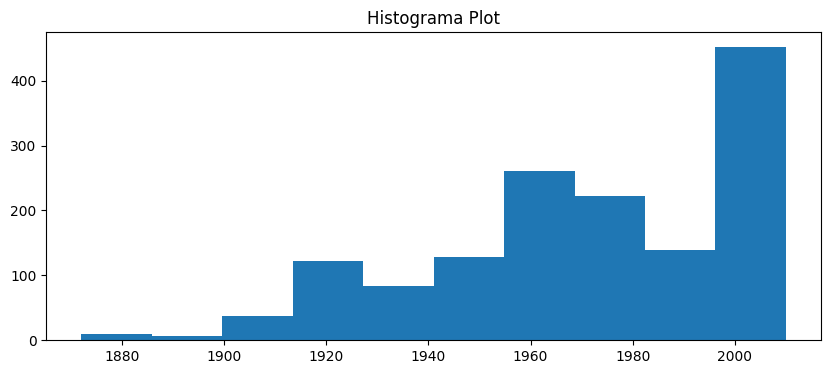

In [ ]:
hists_plot(data['YearBuilt'])

<ipython-input-17-70e5f0238ccb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


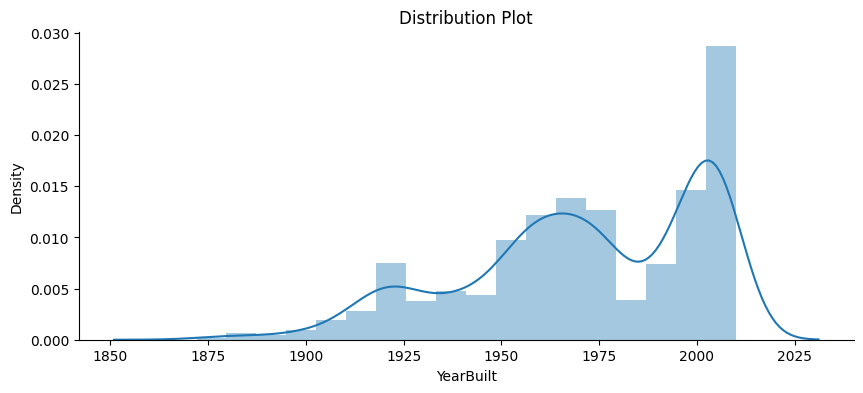

In [ ]:
dist_plot(data['YearBuilt'])

<Figure size 1000x400 with 0 Axes>

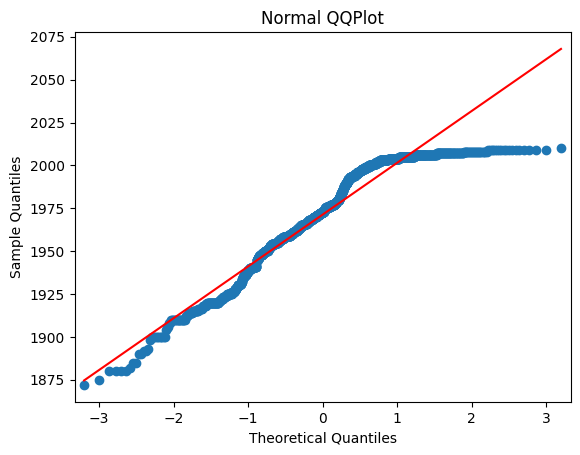

In [ ]:
qq_plots(data['YearBuilt'])

Los datos atípicos se encuentran por debajo del año 1900

## 3.-YrSold
Sus datos atípicos:

In [ ]:
Zscore_outlier(data['YrSold'],umbral=3)

Outliers:  [50271, 159000, 215245, 164660, 53107, 70761, 53227, 46589, 115149, 53504, 45600, 63887, 57200, 1880, 1880, 1880, 1880, 1875, 1872, 1880, 1880, 1880, 1880, 1875, 1872, 2003, 1915, 2004, 1931, 1939, 2005, 2006, 1929, 2004, 2005, 1930, 2002, 2007, 2007, 1927, 1920, 2007, 2005, 2004, 2005, 2003, 2006, 1920, 1934, 2004, 2006, 2004, 1920, 2006, 1921, 2004, 2003, 1915, 1910, 2007, 2005, 2009, 1915, 1921, 1910, 1920, 2009, 1931, 2003, 1885, 1919, 2007, 2006, 2005, 1939, 1935, 1930, 2005, 2004, 1931, 2004, 1936, 2007, 1923, 1924, 2009, 2004, 2005, 2003, 2005, 1926, 1940, 2007, 2004, 1941, 2008, 1923, 1920, 2003, 1908, 1892, 1916, 1932, 2004, 2007, 1918, 1912, 2004, 2003, 1924, 2004, 1925, 2009, 2009, 2004, 1925, 1939, 2005, 2006, 2002, 2003, 2005, 2002, 2004, 2007, 2008, 1900, 1910, 2003, 1940, 2006, 2004, 2003, 2006, 2007, 1929, 1925, 1939, 1940, 2006, 1925, 2003, 2006, 2006, 2007, 2008, 2006, 1915, 2006, 1912, 1880, 2004, 1920, 1940, 2003, 1939, 1925, 2004, 2006, 2006, 2004, 1941,

In [ ]:
Zscore_outlier(data['YrSold'],umbral=1950)

Outliers:  [50271, 159000, 215245, 164660, 53107, 70761, 53227, 46589, 115149, 53504, 45600, 63887, 57200, 1880, 1880, 1880, 1880, 1875, 1872, 1880, 1880, 1880, 1880, 1875, 1872, 2003, 1915, 2004, 1931, 1939, 2005, 2006, 1929, 2004, 2005, 1930, 2002, 2007, 2007, 1927, 1920, 2007, 2005, 2004, 2005, 2003, 2006, 1920, 1934, 2004, 2006, 2004, 1920, 2006, 1921, 2004, 2003, 1915, 1910, 2007, 2005, 2009, 1915, 1921, 1910, 1920, 2009, 1931, 2003, 1885, 1919, 2007, 2006, 2005, 1939, 1935, 1930, 2005, 2004, 1931, 2004, 1936, 2007, 1923, 1924, 2009, 2004, 2005, 2003, 2005, 1926, 1940, 2007, 2004, 1941, 2008, 1923, 1920, 2003, 1908, 1892, 1916, 1932, 2004, 2007, 1918, 1912, 2004, 2003, 1924, 2004, 1925, 2009, 2009, 2004, 1925, 1939, 2005, 2006, 2002, 2003, 2005, 2002, 2004, 2007, 2008, 1900, 1910, 2003, 1940, 2006, 2004, 2003, 2006, 2007, 1929, 1925, 1939, 1940, 2006, 1925, 2003, 2006, 2006, 2007, 2008, 2006, 1915, 2006, 1912, 1880, 2004, 1920, 1940, 2003, 1939, 1925, 2004, 2006, 2006, 2004, 1941,

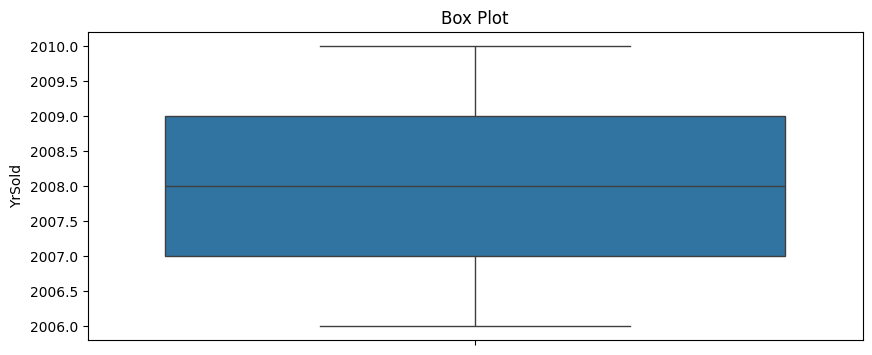

In [ ]:
box_plots(data['YrSold'])

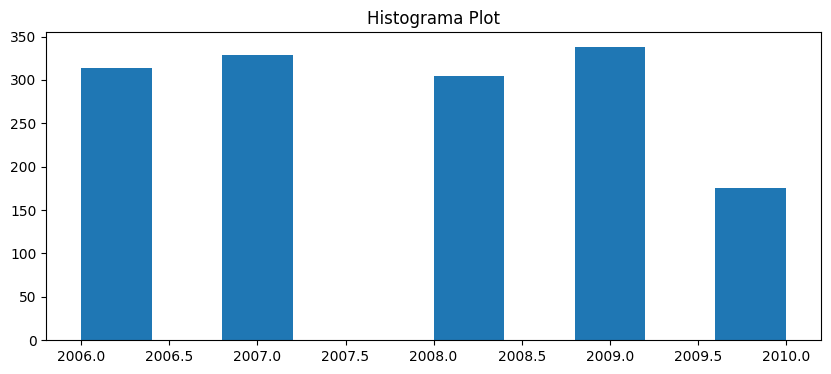

In [ ]:
hists_plot(data['YrSold'])

<ipython-input-17-70e5f0238ccb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


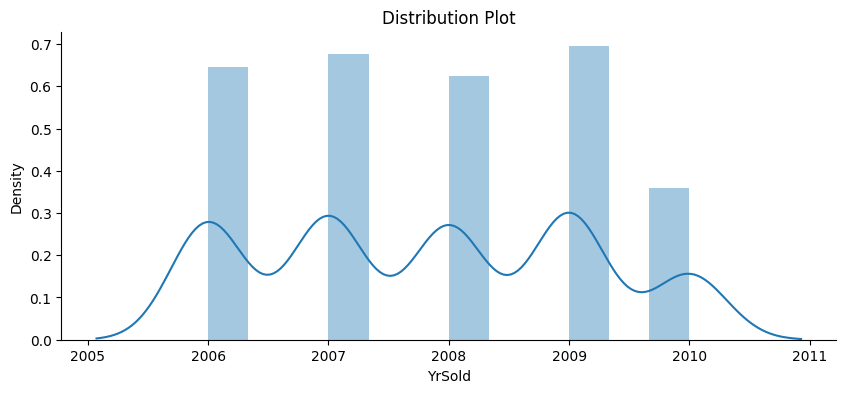

In [ ]:
dist_plot(data['YrSold'])

<Figure size 1000x400 with 0 Axes>

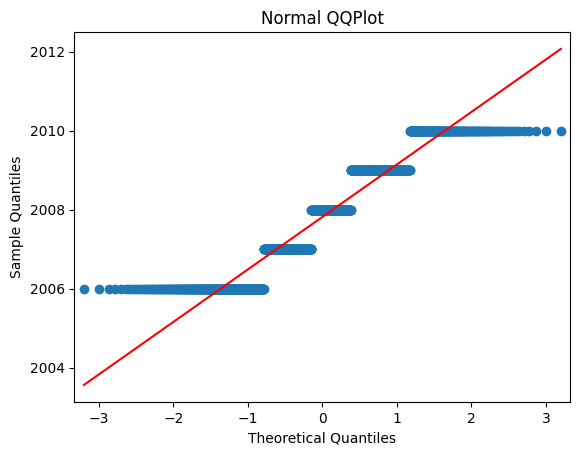

In [ ]:
qq_plots(data['YrSold'])

Agregué este ejercicio porque llamo mi atención al ver que no se detectan como tal atípicos en las gráficas o no son facil de observar si es que los hay.

## 4.-LotArea
Sus datos atípicos:

In [ ]:
Zscore_outlier(data['LotArea'],umbral=3)

Outliers:  [50271, 159000, 215245, 164660, 53107, 70761, 53227, 46589, 115149, 53504, 45600, 63887, 57200, 1880, 1880, 1880, 1880, 1875, 1872, 1880, 1880, 1880, 1880, 1875, 1872, 2003, 1915, 2004, 1931, 1939, 2005, 2006, 1929, 2004, 2005, 1930, 2002, 2007, 2007, 1927, 1920, 2007, 2005, 2004, 2005, 2003, 2006, 1920, 1934, 2004, 2006, 2004, 1920, 2006, 1921, 2004, 2003, 1915, 1910, 2007, 2005, 2009, 1915, 1921, 1910, 1920, 2009, 1931, 2003, 1885, 1919, 2007, 2006, 2005, 1939, 1935, 1930, 2005, 2004, 1931, 2004, 1936, 2007, 1923, 1924, 2009, 2004, 2005, 2003, 2005, 1926, 1940, 2007, 2004, 1941, 2008, 1923, 1920, 2003, 1908, 1892, 1916, 1932, 2004, 2007, 1918, 1912, 2004, 2003, 1924, 2004, 1925, 2009, 2009, 2004, 1925, 1939, 2005, 2006, 2002, 2003, 2005, 2002, 2004, 2007, 2008, 1900, 1910, 2003, 1940, 2006, 2004, 2003, 2006, 2007, 1929, 1925, 1939, 1940, 2006, 1925, 2003, 2006, 2006, 2007, 2008, 2006, 1915, 2006, 1912, 1880, 2004, 1920, 1940, 2003, 1939, 1925, 2004, 2006, 2006, 2004, 1941,

In [ ]:
Zscore_outlier(data['LotArea'],umbral=150000)

Outliers:  [50271, 159000, 215245, 164660, 53107, 70761, 53227, 46589, 115149, 53504, 45600, 63887, 57200, 1880, 1880, 1880, 1880, 1875, 1872, 1880, 1880, 1880, 1880, 1875, 1872, 2003, 1915, 2004, 1931, 1939, 2005, 2006, 1929, 2004, 2005, 1930, 2002, 2007, 2007, 1927, 1920, 2007, 2005, 2004, 2005, 2003, 2006, 1920, 1934, 2004, 2006, 2004, 1920, 2006, 1921, 2004, 2003, 1915, 1910, 2007, 2005, 2009, 1915, 1921, 1910, 1920, 2009, 1931, 2003, 1885, 1919, 2007, 2006, 2005, 1939, 1935, 1930, 2005, 2004, 1931, 2004, 1936, 2007, 1923, 1924, 2009, 2004, 2005, 2003, 2005, 1926, 1940, 2007, 2004, 1941, 2008, 1923, 1920, 2003, 1908, 1892, 1916, 1932, 2004, 2007, 1918, 1912, 2004, 2003, 1924, 2004, 1925, 2009, 2009, 2004, 1925, 1939, 2005, 2006, 2002, 2003, 2005, 2002, 2004, 2007, 2008, 1900, 1910, 2003, 1940, 2006, 2004, 2003, 2006, 2007, 1929, 1925, 1939, 1940, 2006, 1925, 2003, 2006, 2006, 2007, 2008, 2006, 1915, 2006, 1912, 1880, 2004, 1920, 1940, 2003, 1939, 1925, 2004, 2006, 2006, 2004, 1941,

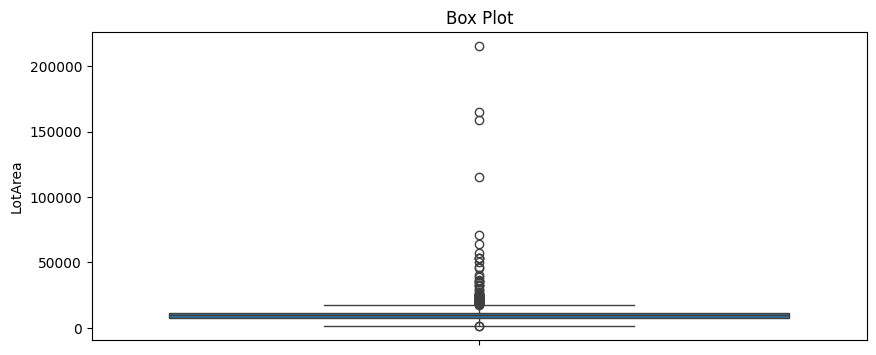

In [ ]:
box_plots(data['LotArea'])

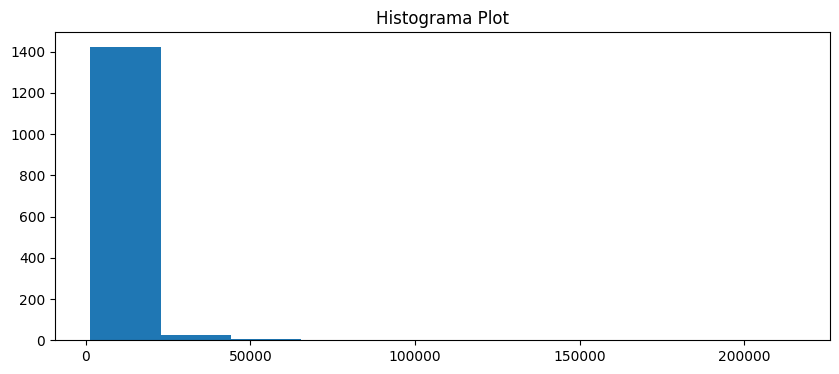

In [ ]:
hists_plot(data['LotArea'])

<ipython-input-17-70e5f0238ccb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


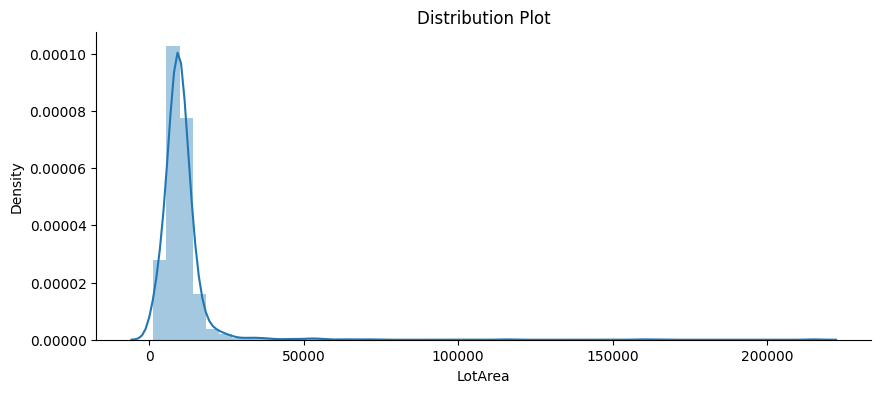

In [ ]:
dist_plot(data['LotArea'])

<Figure size 1000x400 with 0 Axes>

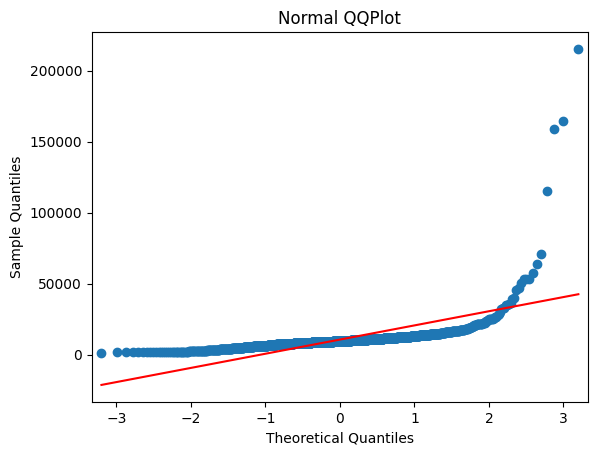

In [ ]:
qq_plots(data['LotArea'])

Los datos atípicos se encuentran arriba de los 2500 o 3000